<H1>Migration velocity</H1>
<P> To compute the velocity of the trajectories of several particles, we generated a file with the 3D coordinates (Position X, Position Y and Position Z) acquired every 10 minutes. 

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read CSV file in pandas
csv = pd.read_csv('.data/Julie_R1_Bef_S4_cell123_Position.csv', skiprows=2) 
csv.head()

,Position X,Position Y,Position Z,Unit,Category,Collection,Time,TrackID,ID,Unnamed: 9
0,22.9271,143.571,0.322853,um,Spot,Position,1,1000000000,0,NaN
1,30.4875,333.832,0.322853,um,Spot,Position,1,1000000001,1,NaN
2,24.3773,142.073,0.322853,um,Spot,Position,2,1000000000,2,NaN
3,33.3073,331.637,0.322853,um,Spot,Position,2,1000000001,3,NaN
4,26.3116,140.029,0.322853,um,Spot,Position,3,1000000000,4,NaN


<H2>Show basic file information</H2>

In [3]:
# get basic information
print('Number of samples %d'%len(csv))
print('Number of particles = %d'%len(csv['TrackID'].unique()))
print('Distance units = %s'%csv['Unit'][0])

Number of samples 318
Number of particles = 3
Distance units = um


In [4]:
# get TrackIDs
TrackID = csv['TrackID'].unique() 

# select only locations, sampling points and TrackIDs
df = csv[['Position X','Position Y', 'Position Z', 'Time','TrackID']]
         
df0 = df.loc[df['TrackID'] == TrackID[0]]
df1 = df.loc[df['TrackID'] == TrackID[1]]
df2 = df.loc[df['TrackID'] == TrackID[2]]

counter = 0
for i in TrackID:
    mysize =  len( df.loc[df['TrackID'] == i] )
    counter +=mysize
    print('Number of samples in TrackID = %d is %d'%(i,mysize))
    
print('Total number of samples %d'%counter)

df0.head() # show first values of first particle

Number of samples in TrackID = 1000000000 is 143
Number of samples in TrackID = 1000000001 is 144
Number of samples in TrackID = 1000000002 is 31
Total number of samples 318


,Position X,Position Y,Position Z,Time,TrackID
0,22.9271,143.571,0.322853,1,1000000000
2,24.3773,142.073,0.322853,2,1000000000
4,26.3116,140.029,0.322853,3,1000000000
6,28.0949,139.157,0.322853,4,1000000000
8,27.8202,138.594,0.322853,5,1000000000


In [5]:
# collect a list of 3d coordinates

P0 = zip(df0['Position X'], df0['Position Y'], df0['Position Z'])
P1 = zip(df1['Position X'], df1['Position Y'], df1['Position Z'])
P2 = zip(df2['Position X'], df2['Position Y'], df2['Position Z'])
P0[0] # test the values are correct

(22.927099999999999, 143.571, 0.322853)

<H2>Compute euclidian distances </H2>

In [6]:
def distance(myarray):
    """
    Calculate the distance between 2 3D coordinates along the 
    axis of the numpy array.
    
    """
    # slice() method is useful for large arrays
    # see diff in ./local/lib/python2.7/site-packages/numpy/lib/function_base.py
    a = np.asanyarray(myarray)

    slice1 = [slice(None)] # create a slice type object
    slice2 = [slice(None)]
    slice1[-1] = slice(1, None)  # like array[1:] 
    slice2[-1] = slice(None, -1) # like array[:-1]
    slice1 = tuple(slice1)
    slice2 = tuple(slice2)

    # calculate sqrt( dx^2 + dy^2 + dz^2)
    sum_squared = np.sum( np.power(a[slice2]-a[slice1],2), axis=1)
    return np.sqrt( sum_squared)

<H2>Velocities</H2>
<P>This is simply the distance if sampling time is constant </P>

In [7]:
# retrieve time vector
#dt = 10 # sampling interval in minutes
dt = 0.1666 # sampling interval in hours
t0 = df0['Time'].values*dt

print(len(t0))

143


In [8]:

D0 = distance(P0) # in um
S0 = D0/10. # speed in um/min
t0 = t0[:-1] # when ploting speeds we do not need the last sampling point

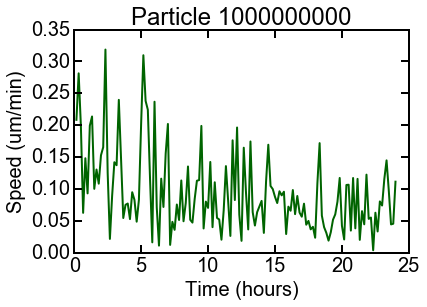

In [9]:
plt.plot(t0, S0, color = '#006400')

plt.ylabel('Speed (um/min)'), 
plt.xlabel('Time (hours)')
plt.title('Particle %d'%TrackID[0]);


<H2>Particle information</H2>

In [10]:
print('Track duration %2.4f min'%(len(t0)*10.))
print('total traveled distances = %2.4f um'%np.sum(D0))
print('total average speed = %2.4f um/min'%S0.mean())

Track duration 1420.0000 min
total traveled distances = 133.6888 um
total average speed = 0.0941 um/min


In [11]:
# retrieve time vector and calculate speed

dt = 0.1666 # sampling interval in hours
t1 = df1['Time'].values*dt

D1 = distance(P1) # in um
S1 = D1/10. #um/min
t1 = t1[:-1] 


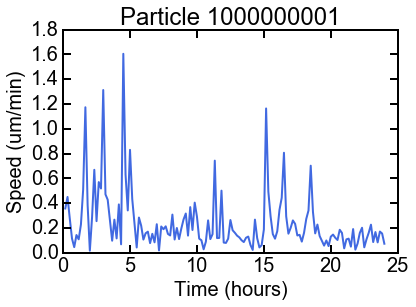

In [12]:
plt.plot(t1, S1, color = '#4169E1')
plt.ylabel('Speed (um/min)'), 
plt.xlabel('Time (hours)')
plt.title('Particle %d'%TrackID[1]);

In [13]:
print('Track duration %2.4f min'%(len(t1)*10.))
print('total traveled distances = %2.4f um'%np.sum(D1))
print('total average speed = %2.4f um/min'%S1.mean())

Track duration 1430.0000 min
total traveled distances = 346.2176 um
total average speed = 0.2421 um/min


In [14]:
# retrieve time vector and calculate speed

dt = 0.1666 # sampling interval in hours
t2 = df2['Time'].values*dt

D2 = distance(P2) # in um
S2 = D2/10. #um/min
t2 = t2[:-1] 

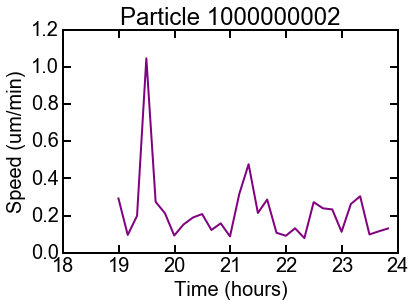

In [15]:
plt.plot(t2, S2, color = '#800080')
plt.xlabel('Time (hours)')
plt.ylabel('Speed (um/min)'), plt.title('Particle %d'%TrackID[2]);

In [16]:
print('Track duration %2.4f min'%(len(t2)*10.))
print('total traveled distances = %2.4f um'%np.sum(D2))
print('total average speed = %2.4f um/min'%S2.mean())

Track duration 300.0000 min
total traveled distances = 66.0373 um
total average speed = 0.2201 um/min


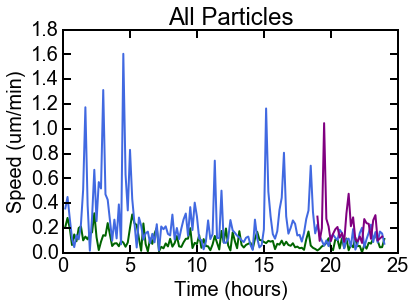

In [17]:
#Overlap
plt.plot(t0, S0, color = '#006400');
plt.plot(t1, S1, color = '#4169E1');
plt.plot(t2, S2, color = '#800080');
plt.xlabel('Time (hours)');
plt.ylabel('Speed (um/min)'), plt.title('All Particles');

<H2>Show normalized speeds</H2>

In [18]:
S0_norm = S0/np.max(S0)
S1_norm = S1/np.max(S1)
S2_norm = S2/np.max(S2)


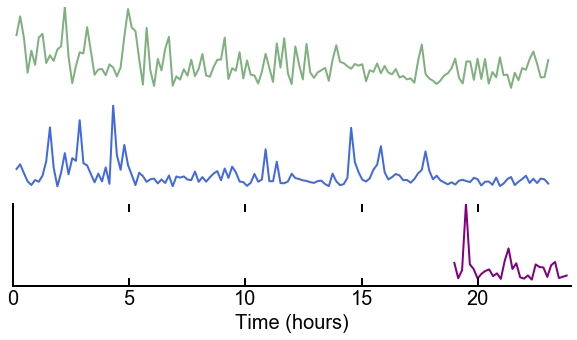

In [19]:
#Overlap
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)


ax1.plot(t0, S0_norm, color = 'darkgreen', alpha=0.5)

ax2.plot(t1, S1_norm, color = 'royalblue')
ax3.plot(t2, S2_norm, color = 'purple')
#ax3.plot(np.arange(1500), mysin, color= 'cyan')


ax3.set_xlabel('Time (hours)');
for ax in fig.axes:

    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    #ax.axis('Off')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
ax3.get_xaxis().set_visible(True)
ax.get_xaxis().set_ticks(np.arange(0,25,5))
ax3.spines['bottom'].set_visible(True)
ax3.spines['left'].set_visible(True)


<H2>Fourier transform</H2>

In [26]:
n = len(S0) # length of the signal
k = np.arange(n)
T = n*dt
frq = k/T # two sides frequency range
frq = frq[range(n/2)] # one side frequency range

Y0 = np.fft.fft(S0)/n # fft computing and normalization
Y0 = Y0[range(n/2)]

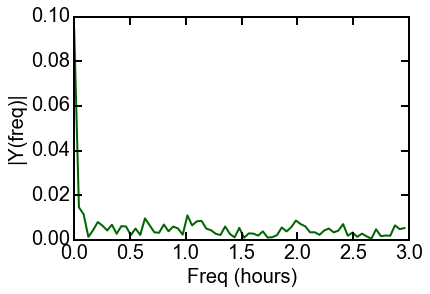

In [27]:

plt.plot(frq, abs(Y0),color = 'darkgreen') # plotting the spectrum
plt.xlabel('Freq (hours)')
plt.ylabel('|Y(freq)|')
#plt.ylim(ymax=0.02)

In [28]:
n = len(S1) # length of the signal
k = np.arange(n)
T = n*dt
frq = k/T # two sides frequency range
frq = frq[range(n/2)] # one side frequency range

Y1 = np.fft.fft(S1)/n # fft computing and normalization
Y1 = Y1[range(n/2)]

(0.0, 0.1)

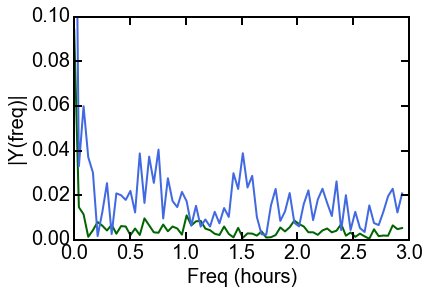

In [31]:
plt.plot(frq, abs(Y0),color = 'darkgreen') # plotting the spectrum
plt.plot(frq, abs(Y1),color = 'royalblue') # plotting the spectrum

plt.xlabel('Freq (hours)')
plt.ylabel('|Y(freq)|')
plt.ylim(ymax = 0.1)